In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

dataset = pd.read_csv('Final_Dataset.csv')
dataset = dataset.rename(columns={'Primary Type': 'primary_type', 'Community Area':'community_area', 'Location Description':'location_description'})
dataset.head()

,community_area,primary_type,Description,Arrest,Domestic,location_description,Date,Comm_Area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,63,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2015-09-24T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,63,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2014-09-07T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,30,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,True,RESIDENCE,2015-06-18T00:00:00.000000,South Lawndale,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,46,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,APARTMENT,2013-08-27T00:00:00.000000,South Chicago,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,16,THEFT,OVER $500,False,False,RESIDENCE,2017-07-14T00:30:00.000000,Irving Park,32.3,3.5,10.3,5.8,10.3,30.2,31043.0


In [90]:
dataset.loc[dataset['primary_type']=='OFFENSE INVOLVING CHILDREN', 'primary_type'] = 'OFFENSE AND KIDNAPPING'
dataset.loc[dataset['primary_type']=='OTHER OFFENSE', 'primary_type'] = 'OFFENSE AND KIDNAPPING'
dataset.loc[dataset['primary_type']=='KIDNAPPING', 'primary_type'] = 'OFFENSE AND KIDNAPPING'

dataset.loc[dataset['primary_type']=='GAMBLING', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='PUBLIC PEACE VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='LIQUOR LAW VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='CRIMINAL TRESPASS', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='CONCEALED CARRY LICENSE VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='STALKING', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='OBSCENITY', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='ARSON', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='DECEPTIVE PRACTICE', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='INTERFERENCE WITH PUBLIC OFFICER', 'primary_type'] = 'PUBLIC ORDER CRIMES'

dataset.loc[dataset['primary_type']=='CRIMINAL SEXUAL ASSAULT', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='SEX OFFENSE', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='CRIM SEXUAL ASSAULT', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='PROSTITUTION', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='HUMAN TRAFFICKING', 'primary_type'] = 'SEXUAL ASSAULT'

dataset.loc[dataset['primary_type']=='THEFT', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='MOTOR VEHICLE THEFT', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='BURGLARY', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='ROBBERY', 'primary_type'] = 'THEFT'

dataset.loc[dataset['primary_type']=='BATTERY', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='HOMICIDE', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='INTIMIDATION', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='WEAPONS VIOLATION', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='CRIMINAL DAMAGE', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='ASSAULT', 'primary_type'] = 'ASSAULT'

dataset.loc[dataset['primary_type']=='OTHER NARCOTIC VIOLATION', 'primary_type'] = 'DRUGS'
dataset.loc[dataset['primary_type']=='NARCOTICS', 'primary_type'] = 'DRUGS'

dataset.loc[dataset['primary_type']=='NON-CRIMINAL (SUBJECT SPECIFIED)', 'primary_type'] = 'NON-CRIMINAL'
dataset.loc[dataset['primary_type']=='NON - CRIMINAL', 'primary_type'] = 'DRUGS'
dataset.loc[dataset['primary_type']=='NON-CRIMINAL', 'primary_type'] = 'DRUGS'

dataset.head()

,community_area,primary_type,Description,Arrest,Domestic,location_description,Date,Comm_Area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2015-09-24T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2014-09-07T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,30,OFFENSE AND KIDNAPPING,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,True,RESIDENCE,2015-06-18T00:00:00.000000,South Lawndale,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,46,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,APARTMENT,2013-08-27T00:00:00.000000,South Chicago,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,16,THEFT,OVER $500,False,False,RESIDENCE,2017-07-14T00:30:00.000000,Irving Park,32.3,3.5,10.3,5.8,10.3,30.2,31043.0


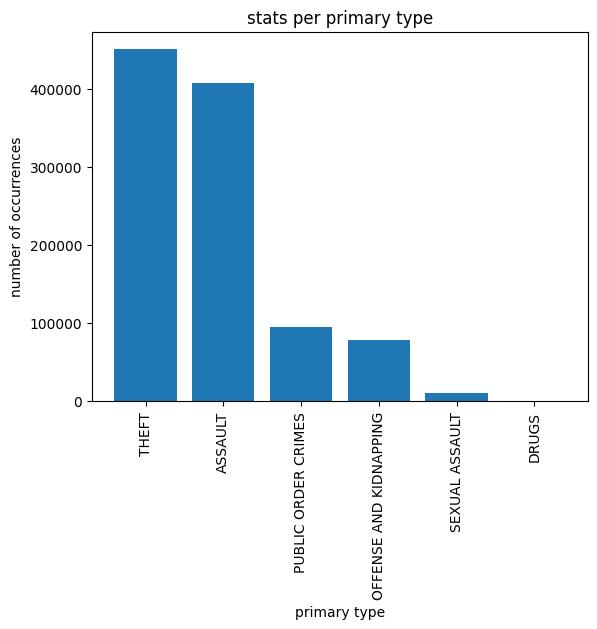

In [91]:
primary_type_counts = dataset['primary_type'].value_counts()

plt.bar(primary_type_counts.index, primary_type_counts)
plt.title('stats per primary type')
plt.xlabel('primary type')
plt.ylabel('number of occurrences')
plt.xticks(rotation=90)
plt.show()

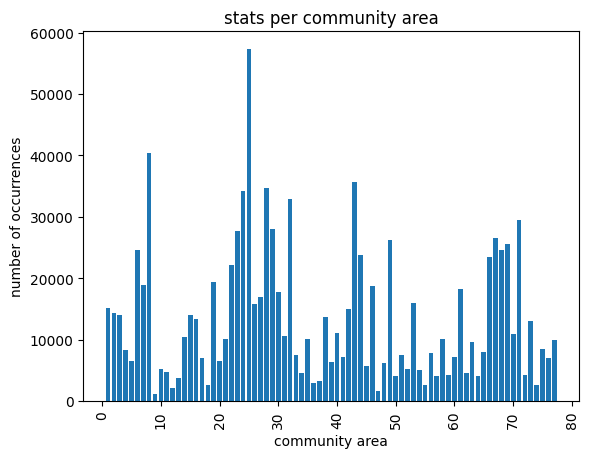

In [92]:
community_area_counts = dataset['community_area'].value_counts()

plt.bar(community_area_counts.index, community_area_counts)
plt.title('stats per community area')
plt.xlabel('community area')
plt.ylabel('number of occurrences')
plt.xticks(rotation=90)
plt.show()

In [93]:
columns = ['Hardship_Score',
       'Crowded_Housing_Per', 'Below_Poverty_Household_Income',
       'Unemployment_Rate', 'No_High_School_Diploma', 'Under_18_over_64',
       'Per_Capita_Income']
for X in columns:
    print(f"Anova test for variable : {X}\n")
    model = ols(f'{X} ~ primary_type', data=dataset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table,"\n")

Anova test for variable : Hardship_Score

                    sum_sq         df            F  PR(>F)
primary_type  1.472899e+07        5.0  9270.579263     0.0
Residual      3.321348e+08  1045245.0          NaN     NaN 

Anova test for variable : Crowded_Housing_Per

                    sum_sq         df            F  PR(>F)
primary_type  5.446332e+04        5.0  1508.436717     0.0
Residual      7.547882e+06  1045245.0          NaN     NaN 

Anova test for variable : Below_Poverty_Household_Income

                    sum_sq         df            F  PR(>F)
primary_type  3.275469e+06        5.0  6372.054894     0.0
Residual      1.074588e+08  1045245.0          NaN     NaN 

Anova test for variable : Unemployment_Rate

                    sum_sq         df            F  PR(>F)
primary_type  2.049240e+06        5.0  6292.134238     0.0
Residual      6.808368e+07  1045245.0          NaN     NaN 

Anova test for variable : No_High_School_Diploma

                    sum_sq         df     

In [ ]:
dataset_kmeans = dataset.copy()
dataset_kmeans = dataset_kmeans.drop(['location_description','community_area','Description','Domestic','Arrest','Date','Comm_Area'],axis=1)
dataset_kmeans

,primary_type,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,OFFENSE AND KIDNAPPING,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,OFFENSE AND KIDNAPPING,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,OFFENSE AND KIDNAPPING,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,PUBLIC ORDER CRIMES,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,THEFT,32.3,3.5,10.3,5.8,10.3,30.2,31043.0
...,...,...,...,...,...,...,...,...
1045246,PUBLIC ORDER CRIMES,70.5,4.0,42.4,34.1,16.1,41.5,12777.0
1045247,PUBLIC ORDER CRIMES,52.6,2.2,24.0,24.3,9.6,41.8,19755.0
1045248,PUBLIC ORDER CRIMES,38.4,2.0,13.7,12.3,8.1,37.8,27488.0
1045249,THEFT,47.9,2.9,26.1,19.0,8.0,37.9,21416.0


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans


X = dataset_kmeans.drop(columns=['primary_type'])
y = dataset_kmeans['primary_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)  # Fit to data, then transform it
X_test_scaled = scaler.transform(X_test)  # Only transform it (using the same mean and variance)

kmeans = MiniBatchKMeans(n_clusters=4, batch_size=100)  # Define KMeans model with number of clusters
kmeans.fit(X_train_scaled) 
silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


KeyboardInterrupt: 

MemoryError: Unable to allocate 2.54 TiB for an array with shape (349614801900,) and data type float64

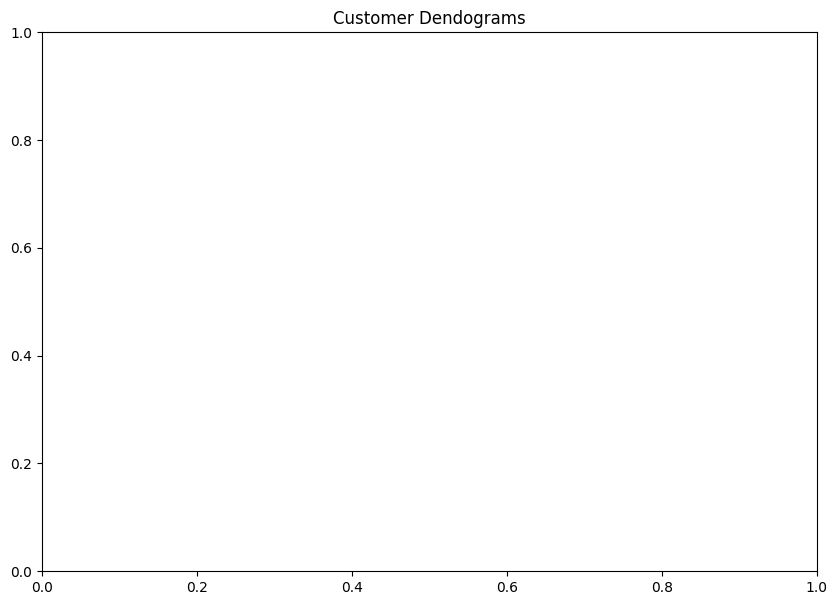

In [95]:
import scipy.cluster.hierarchy as shc

X = dataset_kmeans.drop(columns=['primary_type'])
y = dataset_kmeans['primary_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)  # Fit to data, then transform it
X_test_scaled = scaler.transform(X_test) 

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_train_scaled, metric='euclidean', method='complete'))
plt.show()

In [98]:
dataset

,community_area,primary_type,Description,Arrest,Domestic,location_description,Date,Comm_Area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2015-09-24T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2014-09-07T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,30,OFFENSE AND KIDNAPPING,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,True,RESIDENCE,2015-06-18T00:00:00.000000,South Lawndale,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,46,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,APARTMENT,2013-08-27T00:00:00.000000,South Chicago,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,16,THEFT,OVER $500,False,False,RESIDENCE,2017-07-14T00:30:00.000000,Irving Park,32.3,3.5,10.3,5.8,10.3,30.2,31043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,68,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,NaN,2017-02-15T09:00:00.000000,Englewood,70.5,4.0,42.4,34.1,16.1,41.5,12777.0
1045247,49,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,NaN,2016-05-15T15:00:00.000000,Roseland,52.6,2.2,24.0,24.3,9.6,41.8,19755.0
1045248,48,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,NaN,2017-01-01T09:20:00.000000,Calumet Heights,38.4,2.0,13.7,12.3,8.1,37.8,27488.0
1045249,44,THEFT,OVER $500,False,True,APARTMENT,2017-09-08T10:00:00.000000,Chatham,47.9,2.9,26.1,19.0,8.0,37.9,21416.0


In [101]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

dataset_tree = dataset.copy()
dataset_tree = dataset.drop(['Description','Date','Comm_Area','ocation_description'],axis=1)

X = dataset_tree.drop(columns=['primary_type'])
y = dataset_tree['primary_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the classifier object 
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=100000, min_samples_leaf=1).fit(X_train, y_train) 

# draw the tree
tree.plot_tree(clf)

print("\n***** Learning performances: *****") 
# make predictions
y_pred = clf.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100) 

ValueError: could not convert string to float: 'SCHOOL, PUBLIC, BUILDING'